In [1]:
%matplotlib inline

from modsim import *

In [2]:
bees = System(t0 = 0, 
                t_end = 180,
                adult_pop0 = 15000,
                eggs_pop0 = 0,
                larvae_pop0 = 0,
                hatch_time = .33, 
                mature_time = .05556,
                birth_rate = .4,
                death_rate = .05,
                larvae_death_rate = .15,
                swarm_size = 40000)

bees

,value
t0,0.00000
t_end,180.00000
adult_pop0,15000.00000
eggs_pop0,0.00000
larvae_pop0,0.00000
hatch_time,0.33000
mature_time,0.05556
birth_rate,0.40000
death_rate,0.05000
larvae_death_rate,0.15000


def Var_birth_death_rate(system,t):
    if 1<t<45:
        system.birth_rate=0
        system.death_rate=0
    if 46<t<106:
        system.birth_rate=200
        system.death_rate=0
    if 107<t<258:
        system.birth_rate=0
        system.death_rate=0
    if 259<t<314:
        system.birth_rate=0
        system.death_rate=0
    if 315<t<360:
        system.birth_rate=0
        system.death_rate=0
    
        

def Var_birth_death_rate1(system,t):
    if 1<t<45:
        births=0
        system.death_rate=.05
    if 46<t<106:
        births=200
        system.death_rate=.05
    if 107<t<258:
        births=818
        system.death_rate=.05
    if 259<t<314:
        births= 200
        system.death_rate=.05
    if 315<t<360:
        births=0
        system.death_rate=.05

run_simulation(bees,Var_birth_death_rate)
bees.adults

In [3]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults_res, 'bo-', label='adults')
    plot(system.eggs_res, 'ro-', label='eggs')
    plot(system.larvae_res, 'go-', label='larvae') 
    decorate(xlabel='Day', 
             ylabel='bee population',
             title=title)

run_simulation(bees,Var_birth_death_rate)
plot_results(bees)

In [4]:
bees = System(t0 = 0, 
                t_end = 365,
                adult_pop0 = 40000,
                eggs_pop0 = 0,
                larvae_pop0 = 0,
                hatch_time = .33, 
                mature_time = .05556,
                birth_rate = .4,
                death_rate = .05,
                larvae_death_rate = 0.1,
                swarm_size = 40000,
                births = 0)

bees

,value
t0,0.00000
t_end,365.00000
adult_pop0,40000.00000
eggs_pop0,0.00000
larvae_pop0,0.00000
hatch_time,0.33000
mature_time,0.05556
birth_rate,0.40000
death_rate,0.05000
larvae_death_rate,0.10000


In [5]:
def Var_birth_death_rate1(system,t):
    if 1<t<30:   #jan
        system.birth_rate=0
        system.death_rate=.001
    if 31<t<60: #feb
        system.birth_rate=0
        system.death_rate=.003
    if 61<t<90:   #mar
        system.birth_rate=.028
        system.death_rate=.01
    if 91<t<120:   #apr
        system.birth_rate=.042
        system.death_rate=.02
    if 121<t<150:   #may
        system.birth_rate=.05
        system.death_rate=.03
    if 151<t<181:   #jun
        system.birth_rate=.065
        system.death_rate=.03
    if 181<t<210:   #jul
        system.birth_rate=.075
        system.death_rate=.035
    if 211<t<240:   #aug
        system.birth_rate=.065
        system.death_rate=.04
    if 241<t<270:   #sep
        system.birth_rate=.051
        system.death_rate=.045
    if 271<t<300:   #oct
        system.birth_rate=.042
        system.death_rate=.04
    if 301<t<330:   #nov
        system.birth_rate=.028
        system.death_rate=.03
    if 331<t<365:   #dec
        system.birth_rate=0
        system.death_rate=.003

def run_simulation(system,birth_death):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    eggs = TimeSeries()
    eggs[system.t0] = system.eggs_pop0
    
    larvae = TimeSeries()
    larvae[system.t0] = system.larvae_pop0
    
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    for t in linrange(system.t0, system.t_end):
        #birth_death(system,t)
        births = system.birth_rate * adults[t]
        adult_deaths = system.death_rate * adults[t]
        larvae_deaths = system.death_rate * larvae[t]
        new_larvae = system.hatch_time * eggs[t]
        new_adults = system.mature_time * larvae[t]
        
        eggs[t+1] = eggs[t] + births - new_larvae
        larvae[t+1] = larvae[t] + new_larvae - new_adults - larvae_deaths
        adults[t+1] = adults[t] + new_adults - adult_deaths
        
    system.adults = adults
    system.eggs = eggs
    system.larvae = larvae

bees.adult_pop0 = 1000
run_simulation(bees,Var_birth_death_rate1)
plot_results(bees)

In [6]:
bees = System(t0 = 0, 
                t_end = 365,
                adult_pop0 = 40000,
                eggs_pop0 = 0,
                larvae_pop0 = 0,
                hatch_time = .33, 
                #mature_time = .05556,
                mature_time = .2,
                birth_rate = .4,
                death_rate = .05,
                larvae_death_rate = 0.01,
                swarm_size = 30000,
                births=0,
                deaths=0, adult_res= TimeSeries(), larvae_res= TimeSeries(), eggs_res= TimeSeries())

bees

,value
t0,0
t_end,365
adult_pop0,40000
eggs_pop0,0
larvae_pop0,0
hatch_time,0.33
mature_time,0.2
birth_rate,0.4
death_rate,0.05
larvae_death_rate,0.01


In [7]:
def swarm(system):
    if adults[t+1]>system.swarm_size:
        adults[t+1]=.5*(adults[t] + new_adults - adult_deaths)
    else:
        adults[t+1] = adults[t] + new_adults - adult_deaths

In [8]:
def Var_birth_death_rate2(system,t):
    if 1<t<30:   #jan
        #system.births=0
        system.birth_rate=0
        system.death_rate=.001
    if 31<t<60: #feb
        #system.births=0
        system.birth_rate=0
        system.death_rate=.003
    if 61<t<90:   #mar
        #system.births=420
        system.birth_rate=.028
        system.death_rate=.01
    if 91<t<120:   #apr
        #system.births=630
        system.birth_rate=.042
        system.death_rate=.02
    if 121<t<150:   #may
       # system.births=750
        system.birth_rate=.05
        system.death_rate=.03
    if 151<t<181:   #jun
        #system.births=975
        system.birth_rate=.065
        system.death_rate=.03
    if 181<t<210:   #jul
       # system.births=1125
        system.birth_rate=.075
        system.death_rate=.035
    if 211<t<240:   #aug
       # system.births=975
        system.birth_rate=.065
        system.death_rate=.04
    if 241<t<270:   #sep
        system.births=765
        system.birth_rate=.021
        system.death_rate=.045
    if 271<t<300:   #oct
        system.births=630
        system.birth_rate=.0001
        system.death_rate=.07
    if 301<t<330:   #nov
        system.births=420
        system.birth_rate=.001
        system.death_rate=.03
    if 331<t<365:   #dec
       # system.births=0
        system.birth_rate=0
        system.death_rate=.003

In [9]:

#def sweeping_results(system, t, b, d):
    #Var_birth_death_rate2(system, t)
    #system.birth_rate= system.birth_rate * b
    #system.death_rate= system.death_rate * d

In [10]:
def run_simulation1(system,birth_death, update_rate):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    eggs = TimeSeries()
    eggs[system.t0] = system.eggs_pop0
    
    larvae = TimeSeries()
    larvae[system.t0] = system.larvae_pop0
    
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    for t in linrange(system.t0, system.t_end):
        birth_death(system,t,update_rate)
        #if system.births<system.birth_rate*adults[t]:
        #    births= system.births
        #else:
        #    births=system.birth_rate*adults[t]
        births = system.birth_rate * adults[t]
        adult_deaths = system.death_rate * adults[t]
        #larvae_deaths = system.death_rate * larvae[t]
        new_larvae = system.hatch_time * eggs[t]
        new_adults = system.mature_time * larvae[t]
        
        eggs[t+1] = eggs[t] + system.births - new_larvae
        larvae[t+1] = larvae[t] + new_larvae - new_adults
        adults[t+1] = adults[t] + new_adults - adult_deaths
        
        #if adults[t+1]>system.swarm_size:
            #adults[t+1]=.5*(adults[t] + new_adults - adult_deaths)
        #else:
            #adults[t+1] = adults[t] + new_adults - adult_deaths
    
    system.adult_res= adults
    system.larvae_res= larvae
    system.eggs_res= eggs
        
    #system.adults = adults
    #system.eggs = eggs
    #system.larvae = larvae

In [11]:
def plot_results1(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adult_res, 'bo-', label='adults')
    plot(system.eggs_res, 'ro-', label='eggs')
    plot(system.larvae_res, 'go-', label='larvae') 
    decorate(xlabel='Day', 
             ylabel='bee population',
             title=title)

In [12]:
run_simulation1(bees, sweeping_sys, update_rate)

#print(bees.adult_res)

NameError: name 'sweeping_sys' is not defined

In [13]:
bees.adult_pop0 = 15000
run_simulation1(bees, sweeping_sys, update_rate)

plot_results1(bees,title='Simulation of Hive Population')
savefig('BeeSimulation2.png')

NameError: name 'sweeping_sys' is not defined

##### 

25312.60073


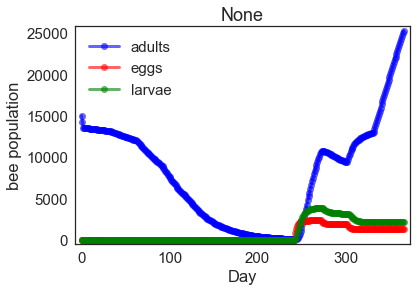

In [14]:

update_rate= System(d=1, b=1)

update_rate.d= 1
update_rate.b= 1

def sweeping_sys(system, t, update_rate):
    Var_birth_death_rate2(system, t)
    system.birth_rate= system.birth_rate * update_rate.b
    system.death_rate= system.death_rate * update_rate.d
        


run_simulation1(bees, sweeping_sys, update_rate)
plot_results1(bees)

print(bees.adult_res[366])

In [16]:
def sweep_deaths(system, update_rate):
    results= TimeSeries()
    results[0]= 0
    for i in linrange(.1, 3, .1):
        update_rate.d=i
        run_simulation1(system, sweeping_sys, update_rate)
        results[i]= system.adult_res[366]
    return results
    
sweep_deaths(bees, update_rate)

,value
0.0,0.000000
0.1,181997.271053
0.2,181997.271053
0.3,181997.271053
0.4,181997.271053
0.5,181997.271053
0.6,181997.271053
0.7,181997.271053
0.8,181997.271053
0.9,181997.271053
